In [1]:
%matplotlib inline

import pandas as pd
import time
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import itertools

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

# Finding anomalies with the matrix profile

Let's look at the NYC taxi passengers dataset

In [2]:
taxi_df = pd.read_csv("https://zenodo.org/record/4276428/files/STUMPY_Basics_Taxi.csv?download=1")
taxi_df['value'] = taxi_df['value'].astype(np.float64)
taxi_df['timestamp'] = pd.to_datetime(taxi_df['timestamp'], format="mixed")
print(f"Number of points in the timeseries: {taxi_df.size}")

Number of points in the timeseries: 7200


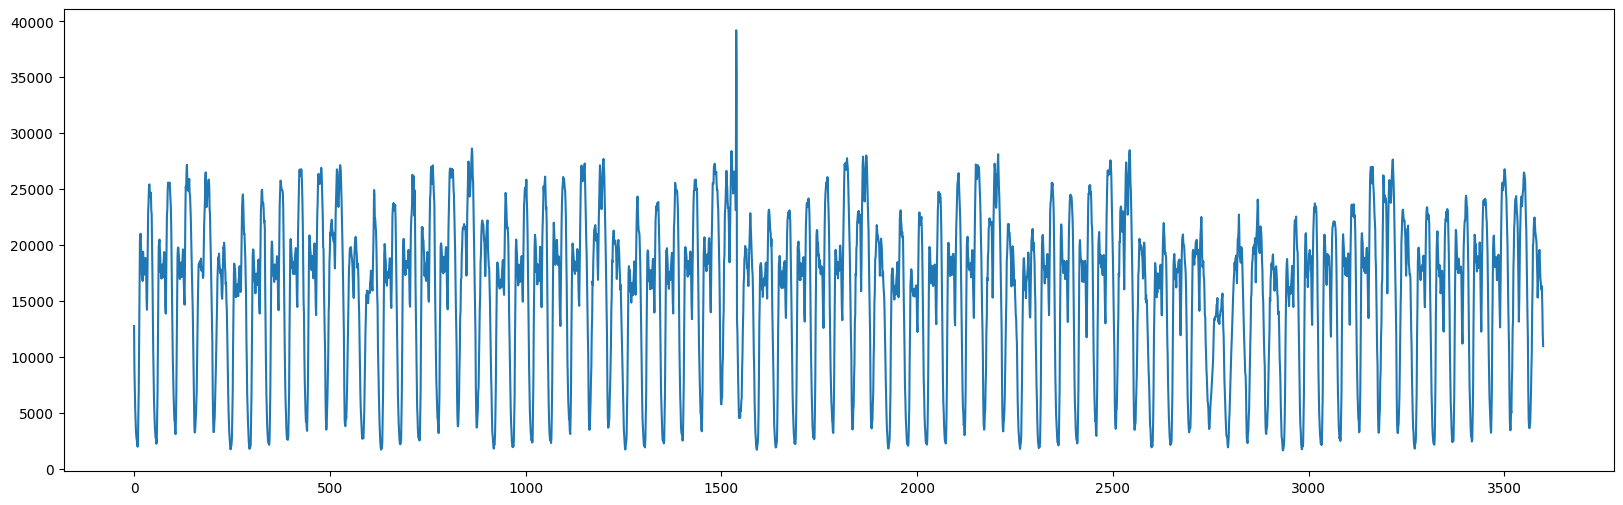

In [3]:
import matplotlib.pyplot as plt
plt.plot(taxi_df['value'])
plt.show()

## Question: are there anomalies?

In [4]:
# pip install pyscamp
import pyscamp

In [5]:
# window of 1 day (48 * 30 minutes)
WINDOW = 48

# compute the matrix profile
profile, index = pyscamp.selfjoin(taxi_df['value'], WINDOW)

print(f"Computed the Matrix Profile for {taxi_df.size} points")

Computed the Matrix Profile for 7200 points


In [6]:
index

array([1680, 1681, 1682, ..., 3214, 3215, 2208], dtype=int32)

In [14]:
def plot_matrix_profile(audio, profile, anomaly_threshold=None):
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})

    axs[0].plot(audio)
    axs[0].set_ylabel('Taxi Passengers', fontsize='20')
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].plot(profile)
    
    if anomaly_threshold: 
        axs[1].plot([anomaly_threshold]*len(profile), label="Anomaly Threshold", linewidth="2")
        plt.legend()
        
    #axs[2].set_ylabel('MP First Order Derivative', fontsize='20')
    #axs[2].plot(np.maximum(0, np.diff(profile)))

    plt.show()

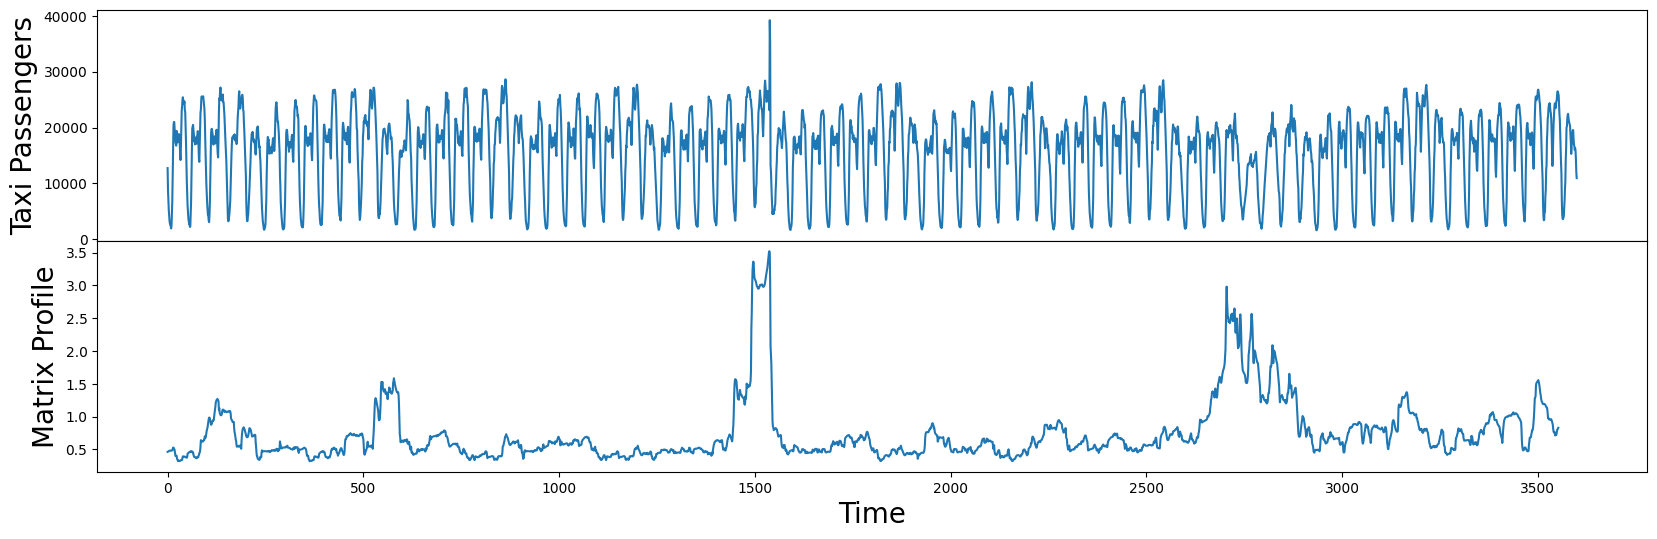

In [15]:
plot_matrix_profile(taxi_df['value'], profile)

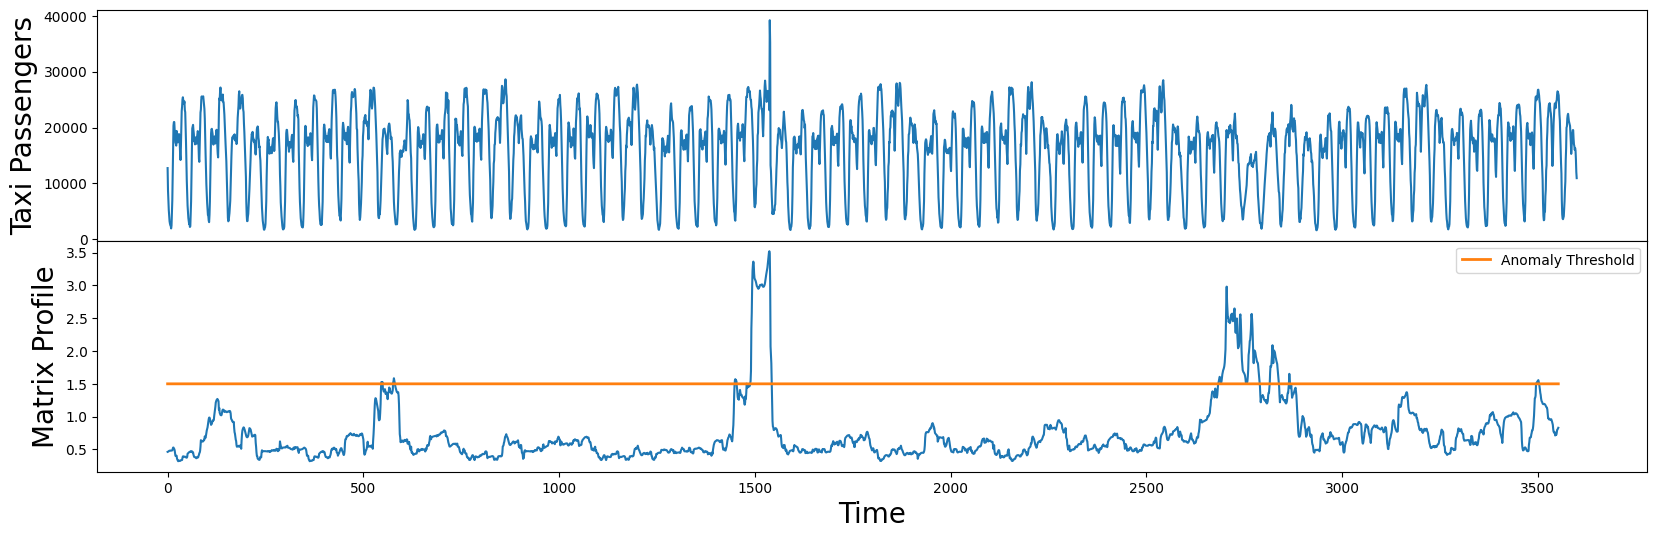

In [16]:
# try with threshold of 3, 2, 1.5
plot_matrix_profile(taxi_df['value'], profile, anomaly_threshold=1.5)

Sensitivity can easily be tuned with a **single parameter** that is **easy to understand**.

In [17]:
def show_events(profile):
    DAY_MULTIPLIER = 7
    plt.suptitle('1-Day STUMP', fontsize='30')
    plt.xlabel('Window Start', fontsize ='20')
    plt.ylabel('Matrix Profile', fontsize='20')
    plt.plot(profile)

    x_axis_labels = taxi_df[(taxi_df.timestamp.dt.hour==0)]['timestamp'].dt.strftime('%b %d').values[::DAY_MULTIPLIER]  

    plt.plot(575, 1.7, marker="v", markersize=15, color='b')
    plt.text(620, 1.6, 'Columbus Day', color="black", fontsize=20)
    plt.plot(1535, 3.7, marker="v", markersize=15, color='b')
    plt.text(1580, 3.6, 'Daylight Savings', color="black", fontsize=20)
    plt.plot(2700, 3.1, marker="v", markersize=15, color='b')
    plt.text(2745, 3.0, 'Thanksgiving', color="black", fontsize=20)
    plt.xticks(np.arange(0, 3553, (WINDOW*DAY_MULTIPLIER)/2), x_axis_labels)
    plt.xticks(rotation=75)
    plt.minorticks_on()
    plt.show()

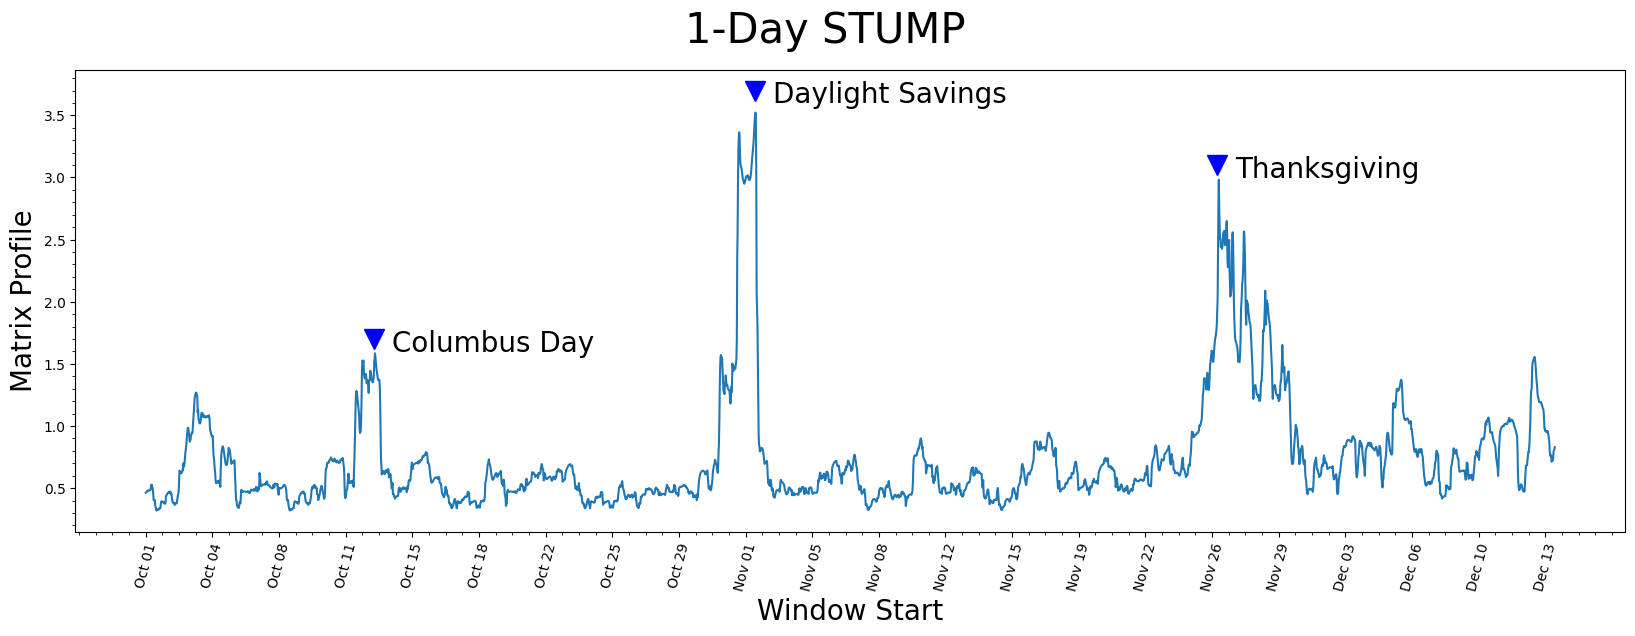

In [18]:
show_events(profile)

Some code extracted from https://stumpy.readthedocs.io/en/latest/Tutorial_STUMPY_Basics.html#Visualizing-the-Matrix-Profile